<a href="https://colab.research.google.com/github/aaaraafaat/Data-Visualization-Projects/blob/main/Data_Visulaization_with_Python%2C_Plotly%2C_Matplotlib_and_PlotlyEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install jupyterthemes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [3]:
#Using Pandas, read the "cars.csv" dataset
url = 'https://raw.githubusercontent.com/aaaraafaat/Data-Analysis-101/c785d39ee2fcade6008ff28c592c07b1299fe567/cars.csv'
df = pd.read_csv(url)
display(df.head())

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [4]:
#Check Non-Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [5]:
#Check Null Values
df.isnull().sum()

,0
Make,0
Model,0
Type,0
Origin,0
DriveTrain,0
MSRP,0
Invoice,0
EngineSize,0
Cylinders,2
Horsepower,0


In [6]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [7]:
#Remove $ sign and comma (,) from MSRP and Invoice
df["MSRP"] = df["MSRP"].str.replace("$", "")
df["MSRP"] = df["MSRP"].str.replace(",", "")
df["MSRP"] = df["MSRP"].astype(int)

df["Invoice"] = df["Invoice"].str.replace("$", "")
df["Invoice"] = df["Invoice"].str.replace(",", "")
df["Invoice"] = df["Invoice"].astype(int)

display(df.head())

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [21]:
#Convert MSRP and Invoice columns to integer datatypes
df["MSRP"] = df["MSRP"].astype(int)
df["Invoice"] = df["Invoice"].astype(int)


In [10]:
# Plot the scattermatrix and pairplot
fig = px.scatter_matrix(df, width=2000, height=2000)
fig.show ()


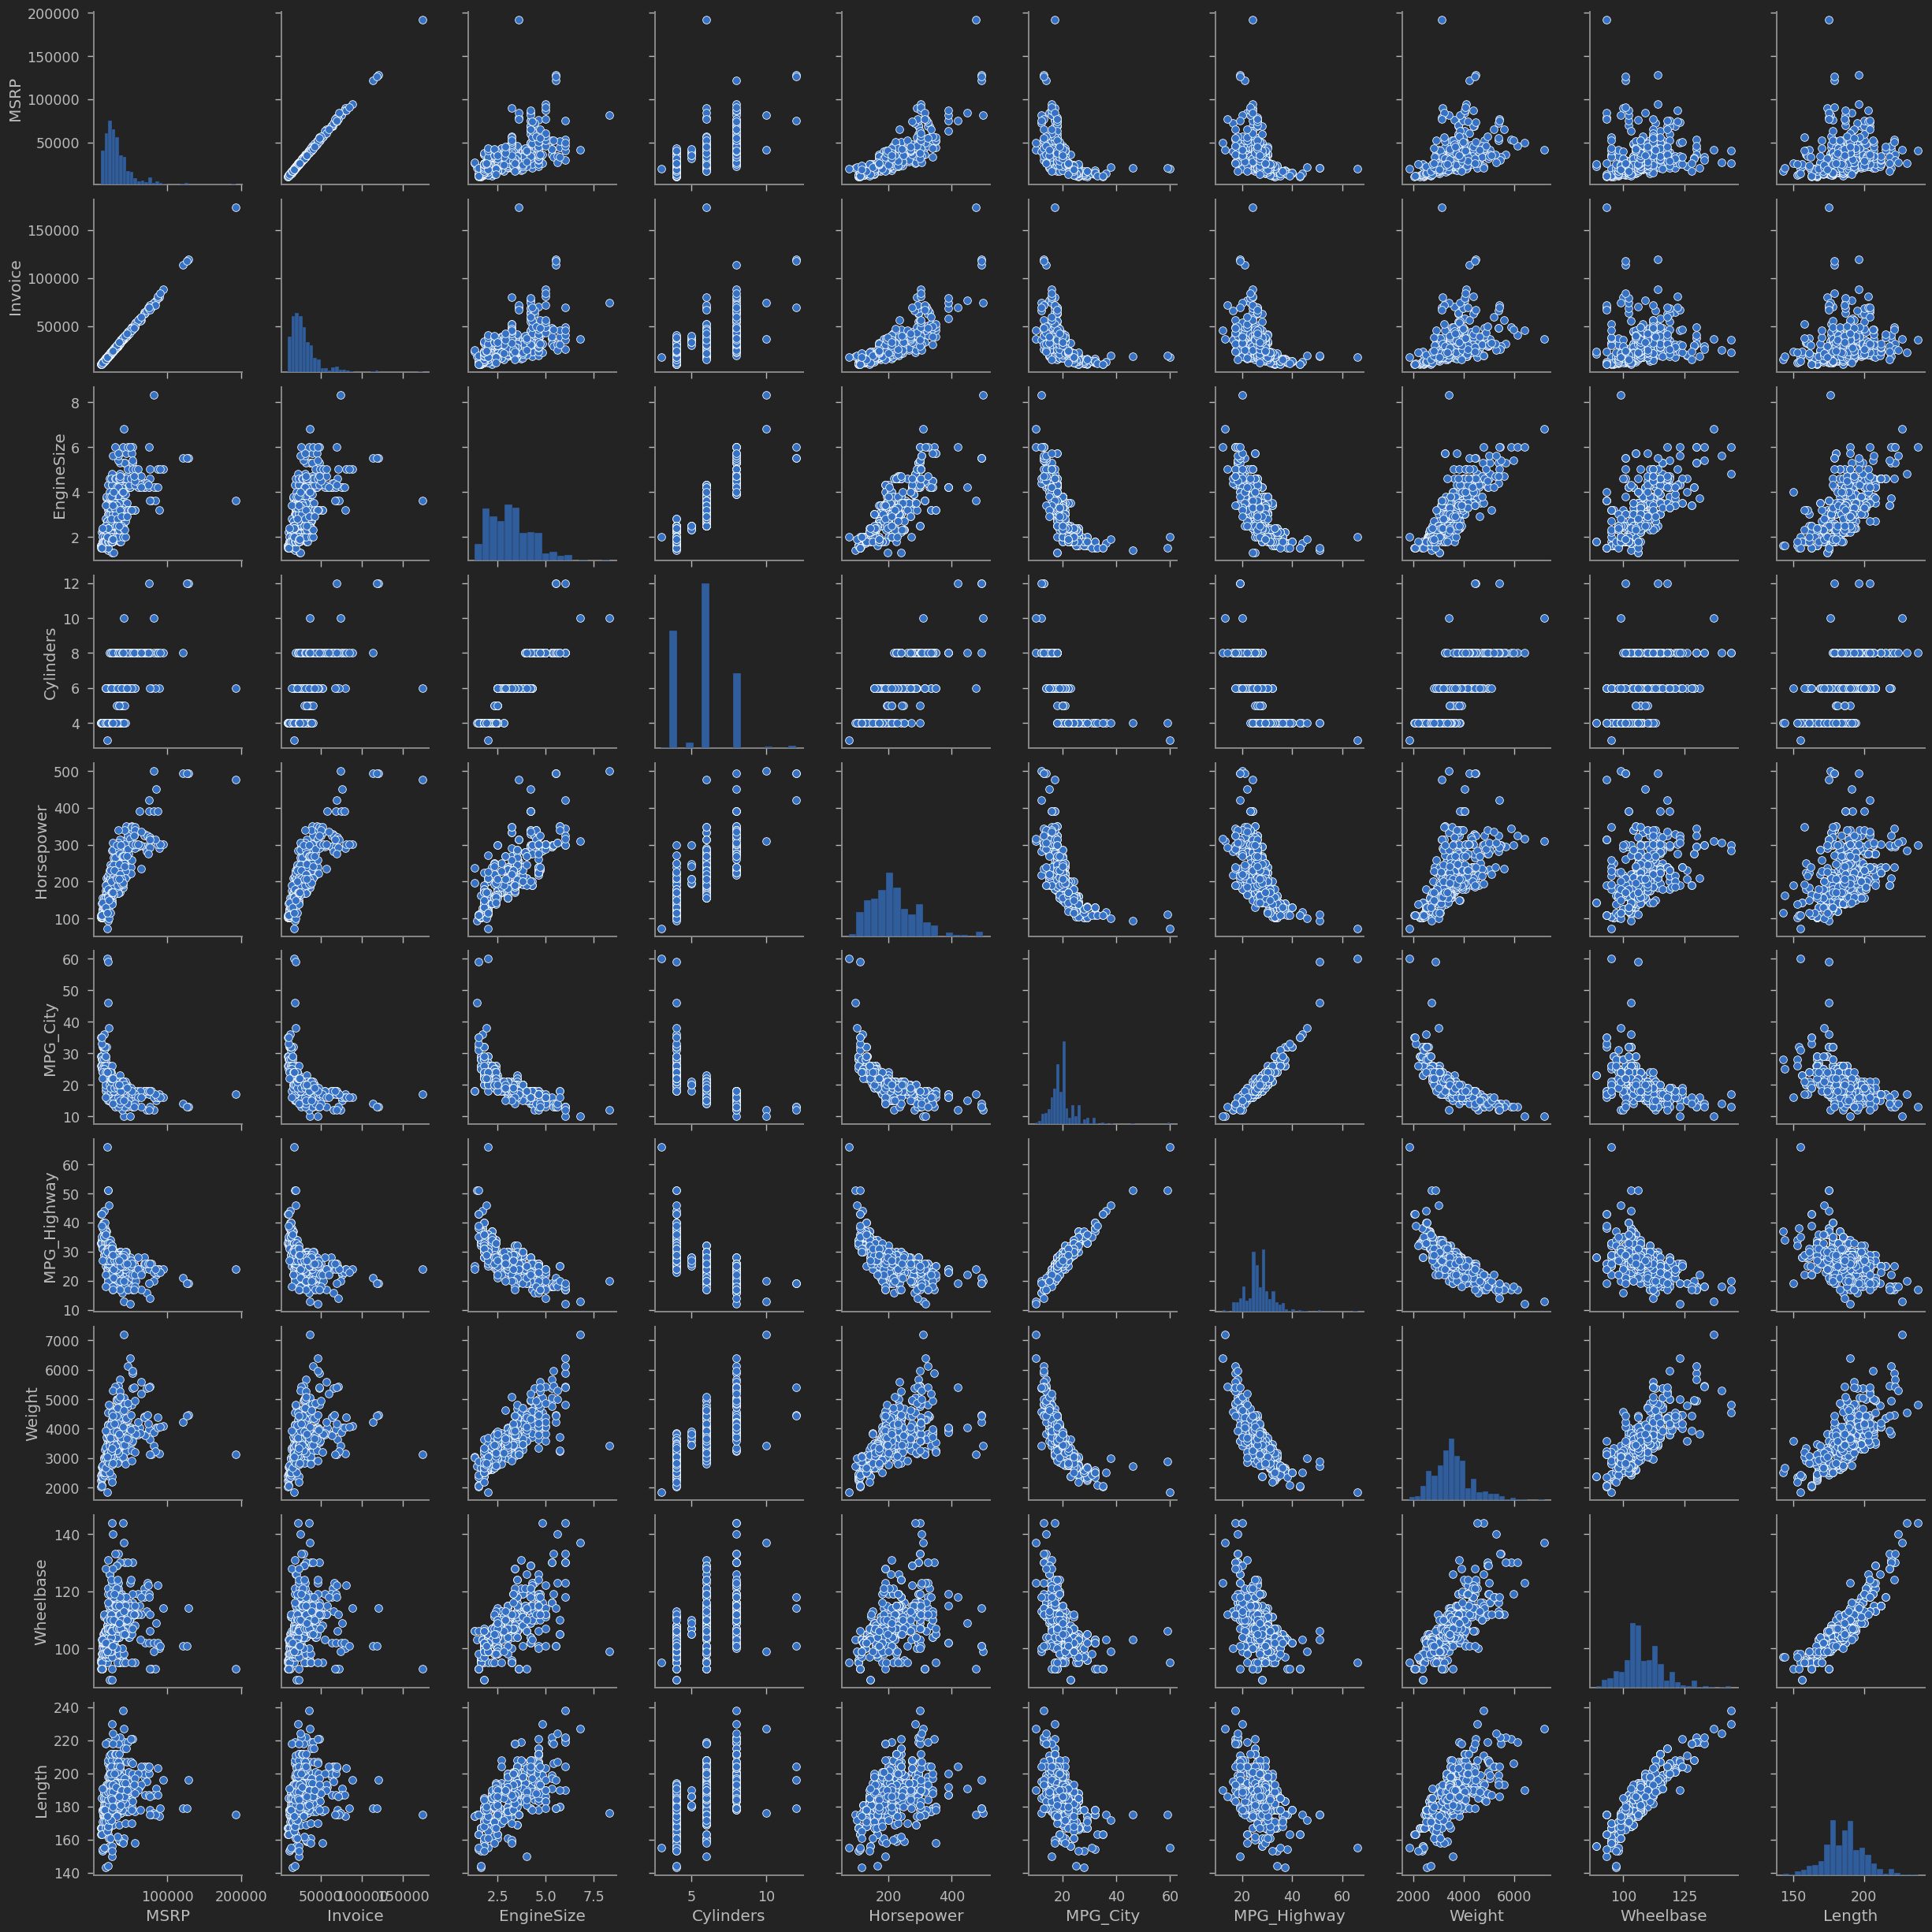

In [11]:
sns.pairplot(df)

In [13]:
# Plot a scatterplot between 'Horsepower' and 'MSRP' while showing 'Make' as text. Use the 'Cylinders' column to display color.
fig = px.scatter(df, x="Horsepower", y="MSRP", color="Cylinders", hover_name="Make", title="Horsepower vs. MSRP")
fig.show()

In [15]:
df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
# Plot the wordcloud of the Make column


In [18]:
# Plot the histogram of Make and Type of the car using Plotly Express
fig = px.histogram(df, x="Make", color="Type")
fig.show()

In [ ]:
# Find out which manufacturer has high number of Sports type
Porshe

In [ ]:
# Find out which manufacturers has Hybrids
Toyota & Honda

In [24]:
# Plot the correlation matrix using plotly express and Seaborn

# Select only the numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Plot the correlation matrix using plotly express and Seaborn
fig = px.imshow(numerical_df.corr())
fig.show()


<Axes: >

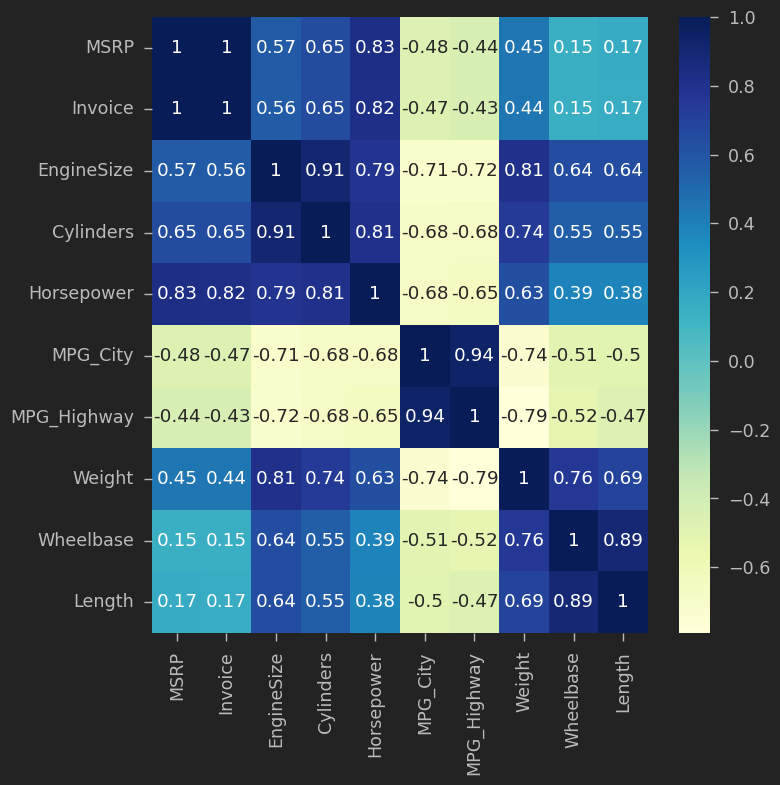

In [28]:
plt.figure(figsize = (8,8))
sns.heatmap(numerical_df.corr(), cmap="YlGnBu", annot = True)

In [ ]:
# Comment on the correlation matrix, which feature has the highest positive

# Positive correlation between engine size and number of cylinders
# Positive correlation between horsepower and number of cylinders
# highest positive correlation with MSRP is = horsepower
